In [20]:
from downloadModelNet import ModelNet, downloadModelNet
import torch

In [21]:
# this may take around 10 minutes to download and process the data
downloadModelNet(nx=15)

In [22]:
train = ModelNet()
# %timeit img = train[1200][0]

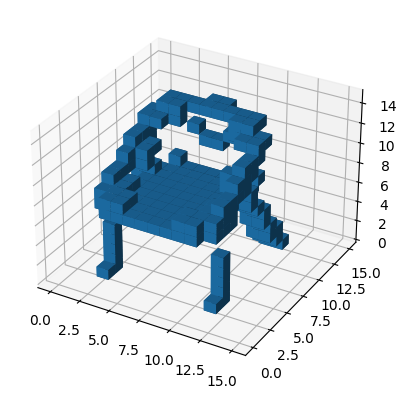

In [23]:
import matplotlib.pyplot as plt
img = train[1200][0]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.voxels(img[0])
plt.show()

In [24]:
len(train)

3991

In [25]:
test = ModelNet(train=False)
len(test)

908

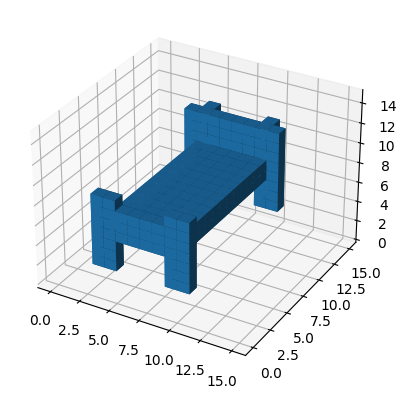

In [26]:
img = test[100][0]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.voxels(img[0])
plt.show()

In [27]:
def coarsen(img):
    nx = img.shape[2]
    nxc = (nx + 1) // 2 - 1
    return torch.nn.functional.interpolate(img, [nxc, nxc, nxc], mode='trilinear', align_corners=False)

def refine(img):
    nx = img.shape[2]
    nxf = (nx + 1) * 2 - 1
    return torch.nn.functional.interpolate(img, [nxf, nxf, nxf], mode='trilinear', align_corners=False)

In [28]:
# test coarsen and refine on vector of all ones
ones = torch.ones(50, 4, 31, 31, 31)
            
# %timeit coarsen(ones)
coarse = coarsen(ones)
# %timeit refine(coarse)
refined = refine(coarse)
print(refined[0, 0][7])
print(coarse.shape)
print(refined.shape)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],

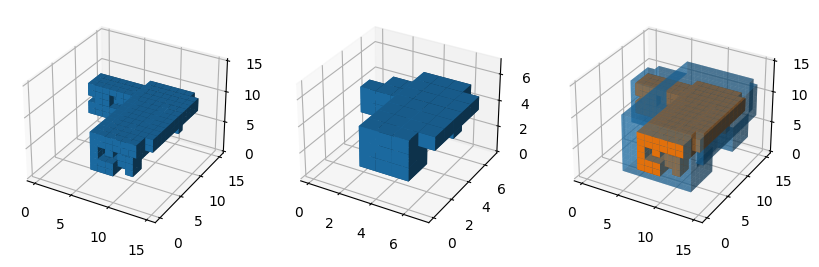

In [37]:
# randomly select an image from the test set
rand_index = torch.randint(0, len(test), (1,)).item()
img = test[rand_index][0]
img = torch.unsqueeze(img, 0)
coarse = coarsen(img)
refined = refine(coarse)

# plot coarse, original, and refined with 3d subplots
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.voxels(img[0][0])
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.voxels(coarse[0][0])
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.voxels(refined[0][0], alpha=0.5)
ax.voxels(img[0][0])
plt.show()

In [30]:
channels, steps, sdict = torch.load("models/nx15_nt32.pt")

In [31]:
sdict

OrderedDict([('parallel_nn.local_layers.0.layer.conv1.weight',
              tensor([[[[[ 0.0648,  0.0030,  0.0431],
                         [-0.0202,  0.0327,  0.0233],
                         [ 0.0751, -0.0836, -0.0217]],
              
                        [[ 0.0519, -0.0439, -0.0701],
                         [ 0.0625,  0.0495,  0.0890],
                         [ 0.0376, -0.0257, -0.0747]],
              
                        [[-0.0616,  0.0287, -0.0182],
                         [ 0.0914,  0.0638,  0.0084],
                         [ 0.0934,  0.0107,  0.0206]]],
              
              
                       [[[ 0.0945, -0.0116,  0.0297],
                         [-0.0056,  0.0894,  0.0423],
                         [-0.0316, -0.0852,  0.0119]],
              
                        [[ 0.0002,  0.0418,  0.0408],
                         [-0.0876, -0.0793, -0.0262],
                         [-0.0823,  0.0049,  0.0573]],
              
                        [[ 0.09